# Importing Libraries & Data

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = '../data/Life-Expectancy-Data-Updated.csv'
df = pd.read_csv(url)
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


# Data Exploration

In [4]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [5]:
df.nunique()

Country                         179
Region                            9
Year                             16
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_expectancy                 396
dtype: int64

In [6]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [7]:
df['Year'].max()

2015

# Data Preparation

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [9]:
y = df['Life_expectancy']
X = df.drop('Life_expectancy', axis=1)

In [10]:
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_t = pipeline.fit_transform(X)

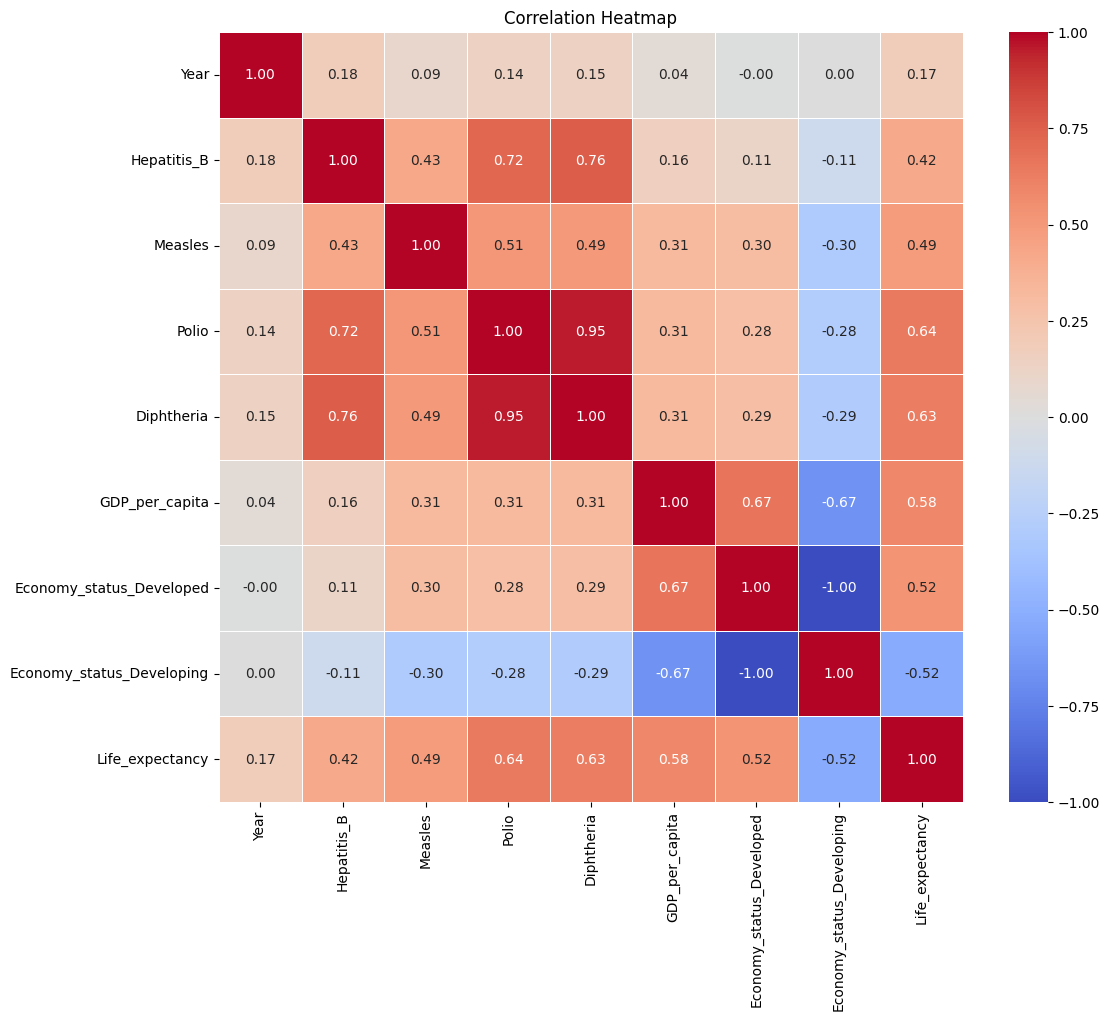

In [11]:
data_numeric_and_target = pd.concat([df[numeric_features], y], axis=1)

correlation_matrix = data_numeric_and_target.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Model training & testing

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_t,y)

LinearRegression()

In [14]:
import random

In [20]:
test = {
    'Country': ['France'], #Value to enter
    'Region': ['European Union'], #Auto-value based on Country
    'Year': [2015], #To be removed
    'Infant_deaths': [random.uniform(1, 10)], #Auto-value based on Country
    'Under_five_deaths': [random.uniform(1, 15)], #Auto-value based on Country
    'Adult_mortality': [random.uniform(80, 120)], #Auto-value based on Country
    'Alcohol_consumption': [random.uniform(1, 10)], #Value to enter
    'Hepatitis_B': [random.randint(80, 100)], #Value to enter
    'Measles': [random.uniform(0, 10)], #Value to enter
    'BMI': [30], #Value to enter - model to be corrected
    'Polio': [random.randint(80, 100)], #Value to enter
    'Diphtheria': [random.randint(80, 100)], #Value to enter
    'Incidents_HIV': [random.uniform(0, 1)], #Value to enter
    'GDP_per_capita': [random.uniform(30000, 60000)], #Value to enter
    'Population_mln': [random.uniform(60, 80)], #Auto-value based on Country
    'Thinness_ten_nineteen_years': [random.uniform(1, 5)], #To be removed
    'Thinness_five_nine_years': [random.uniform(1, 5)],  #To be removed
    'Schooling': [random.uniform(15, 20)],  #Auto-value based on Country may change later
    'Economy_status_Developed': [1],  #Auto-value based on Country - to be fused
    'Economy_status_Developing': [0]  #Auto-value based on Country - to be fused
}

In [21]:
X_test = pd.DataFrame(test)

In [22]:
X_test_t = pipeline.transform(X_test)

In [23]:
model.predict(X_test_t)

array([82.94539946])